In [1]:
cd ../TileEM/

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [6]:
Qj=pkl.load(open("Qj.pkl",'r'))
worker_obj_tbl = Qj
Athres_lst = [1,10,50,100]
for Athres in Athres_lst:
    Qj12=pkl.load(open("Qj12_A>{}.pkl".format(Athres),'r'))
    Qj12=Qj12.rename(columns = {'Q1':'Q1[A>{}]'.format(Athres),'Q2':'Q2[A<{}]'.format(Athres)})
    worker_obj_tbl =worker_obj_tbl.merge(Qj12)
p_lst = []
r_lst = []
for objid in list(set(worker_obj_tbl.object_id)):
    workers = list(worker_obj_tbl[worker_obj_tbl["object_id"]==objid].worker_id)
    p,r = compute_worker_lst_PR_obj(objid,workers)
    p_lst.extend(p)
    r_lst.extend(r)
worker_obj_tbl["Precision"]=p_lst
worker_obj_tbl["Recall"]=r_lst
worker_obj_tbl.to_csv("worker_obj_qualities.csv",index=None)

In [7]:
worker_obj_tbl.head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
0,1,75,0.492954,0.452618,0.502315,0.500000,0.492850,0.375,0.493176,0.25,0.493183,0.185230,0.951235
1,1,114,0.348286,0.320449,0.354745,0.419355,0.347235,0.375,0.348235,0.25,0.348378,0.183556,0.992826
2,1,116,0.641146,0.593516,0.652199,0.483871,0.643470,0.375,0.641647,0.25,0.641514,0.190723,0.962686
3,1,118,0.466416,0.498753,0.458912,0.483871,0.466158,0.375,0.466588,0.25,0.466620,0.187262,0.949083
4,1,133,0.268436,0.265586,0.269097,0.193548,0.269542,0.125,0.268706,0.25,0.268453,0.174196,0.980233


In [4]:
df = pd.read_csv("worker_obj_qualities.csv")

In [5]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [6]:
df.sort(columns=["Recall","Precision"],ascending=False).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
375,10,2,0.966694,0.925032,0.972871,0.853333,0.968106,0.947368,0.966754,0.928571,0.966782,1.000000,1
456,12,2,0.979547,0.963283,0.981614,0.975000,0.979592,1.000000,0.979537,1.000000,0.979542,1.000000,1
54,2,175,0.595986,0.562500,0.603424,0.500000,0.597688,0.375000,0.596658,0.250000,0.596511,0.786147,1
701,19,174,0.438519,0.515406,0.430104,0.571429,0.437743,0.500000,0.438451,0.666667,0.438330,0.671919,1
576,15,261,0.457944,0.500000,0.453767,0.818182,0.453782,0.909091,0.455352,0.875000,0.456204,0.595346,1


In [7]:
df.sort(columns=["Precision"],ascending=False).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
669,18,187,0.315503,0.384036,0.285992,0.444444,0.307692,0.400,0.314535,0.285714,0.315693,1,0.501236
1586,42,230,0.533103,0.554156,0.526866,0.490909,0.534483,0.625,0.532678,0.666667,0.532640,1,0.094305
1557,42,141,0.521589,0.586902,0.502239,0.472727,0.523187,0.625,0.521110,0.666667,0.521086,1,0.097924
1569,42,181,0.472654,0.544081,0.451493,0.472727,0.472652,0.625,0.471949,0.666667,0.471982,1,0.093519
674,18,114,0.312783,0.375000,0.285992,0.404762,0.307212,0.240,0.313618,0.071429,0.314325,1,0.002375


In [8]:
df.sort(columns=["Precision"],ascending=True).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
846,22,213,0.815463,0.742308,0.824604,0.391304,0.819672,0.444444,0.816895,0.333333,0.816702,0,0
764,20,82,0.378286,0.393324,0.368520,0.529412,0.362025,0.636364,0.369912,0.675676,0.371862,0,0
743,20,174,0.377714,0.387518,0.371348,0.517647,0.362658,0.563636,0.371681,0.567568,0.373614,0,0
821,22,174,0.813755,0.726923,0.824604,0.304348,0.818809,0.333333,0.815609,0.333333,0.814989,0,0
739,20,38,0.354286,0.343977,0.360980,0.405882,0.348734,0.381818,0.353392,0.378378,0.353765,0,0


In [9]:
df[df["object_id"]==34].sort(columns=["Q2[A<10]","Recall"],ascending=False)

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
1289,34,243,0.769795,0.804770,0.761168,0.833333,0.768365,0.821429,0.769542,0.733333,0.769891,0.986704,0.969467
1290,34,197,0.735186,0.780035,0.724123,0.833333,0.732976,0.821429,0.734762,0.733333,0.735191,0.992352,0.953260
1259,34,140,0.722776,0.735866,0.719547,0.690476,0.723503,0.750000,0.722642,0.666667,0.722923,0.269113,0.985286
1278,34,208,0.709841,0.723498,0.706472,0.738095,0.709205,0.821429,0.709292,0.733333,0.709779,0.968489,0.970450
1281,34,135,0.692012,0.775618,0.671388,0.841270,0.688651,0.821429,0.691375,0.733333,0.691903,0.989197,0.960645
1287,34,230,0.689740,0.737633,0.677925,0.785714,0.687578,0.821429,0.689092,0.733333,0.689625,0.977669,0.969872
1256,34,116,0.678378,0.736749,0.663979,0.801587,0.675603,0.821429,0.677674,0.733333,0.678233,0.986174,0.954847
1265,34,146,0.672260,0.708481,0.663325,0.801587,0.669348,0.821429,0.671526,0.733333,0.672100,0.984807,0.959395
1270,34,192,0.663346,0.715548,0.650469,0.746032,0.661483,0.821429,0.662568,0.733333,0.663162,0.972423,0.969853
1288,34,235,0.646041,0.756184,0.618871,0.888889,0.640572,0.821429,0.645178,0.733333,0.645811,0.993635,0.952593


In [10]:
df[df["object_id"]==34]

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
1255,34,114,0.560042,0.541519,0.564611,0.642857,0.558177,0.750000,0.559108,0.733333,0.559586,0.955636,0.962785
1256,34,116,0.678378,0.736749,0.663979,0.801587,0.675603,0.821429,0.677674,0.733333,0.678233,0.986174,0.954847
1257,34,131,0.540465,0.657244,0.511658,0.817460,0.534227,0.821429,0.539083,0.733333,0.539958,0.988487,0.941475
1258,34,133,0.569481,0.579505,0.567008,0.587302,0.569080,0.678571,0.568944,0.666667,0.569225,0.942184,0.962649
1259,34,140,0.722776,0.735866,0.719547,0.690476,0.723503,0.750000,0.722642,0.666667,0.722923,0.269113,0.985286
1260,34,148,0.623842,0.703180,0.604271,0.801587,0.619839,0.821429,0.622870,0.733333,0.623554,0.990079,0.949964
1261,34,147,0.619822,0.628975,0.617564,0.619048,0.619839,0.464286,0.620587,0.400000,0.620400,0.262425,0.879698
1262,34,143,0.446600,0.545936,0.422096,0.753968,0.439678,0.785714,0.444932,0.666667,0.446022,0.975097,0.930510
1263,34,137,0.518441,0.574205,0.504685,0.714286,0.514030,0.750000,0.517302,0.666667,0.518051,0.973732,0.898330
1264,34,151,0.597273,0.661661,0.581390,0.777778,0.593208,0.785714,0.596346,0.733333,0.596916,0.986291,0.941736


# Correlation between variables

In [11]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
Qj,1.000000,0.840894,0.992099,0.449735,0.999158,0.238465,0.999892,0.213612,0.999950,0.264385,0.088495
Q1[A>1],0.840894,1.000000,0.779707,0.693154,0.830471,0.373042,0.838932,0.318615,0.839779,0.345471,0.113036
Q2[A<1],0.992099,0.779707,1.000000,0.385941,0.995185,0.192739,0.992944,0.174328,0.992634,0.239747,0.082893
Q1[A>10],0.449735,0.693154,0.385941,1.000000,0.429339,0.694562,0.444605,0.601090,0.446697,0.437411,0.203088
Q2[A<10],0.999158,0.830471,0.995185,0.429339,1.000000,0.220327,0.999570,0.197543,0.999440,0.257773,0.086886
Q1[A>50],0.238465,0.373042,0.192739,0.694562,0.220327,1.000000,0.231295,0.864929,0.234114,0.367643,0.115734
Q2[A<50],0.999892,0.838932,0.992944,0.444605,0.999570,0.231295,1.000000,0.207072,0.999984,0.261186,0.088307
Q1[A>100],0.213612,0.318615,0.174328,0.601090,0.197543,0.864929,0.207072,1.000000,0.209053,0.341579,0.094882
Q2[A<100],0.999950,0.839779,0.992634,0.446697,0.999440,0.234114,0.999984,0.209053,1.000000,0.262375,0.088695
Precision,0.264385,0.345471,0.239747,0.437411,0.257773,0.367643,0.261186,0.341579,0.262375,1.000000,0.148219


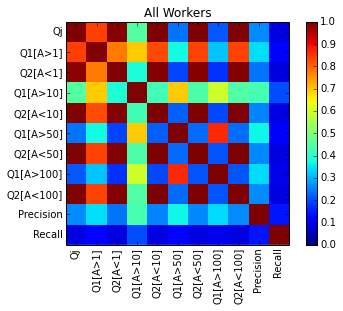

In [12]:
plt.title("All Workers")
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()
plt.clim(0,1)

# Regression against  ground truth PR

In [13]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['Precision'];y=['Q1[A>10]']
Coefficients:  [[ 0.33311591]]
Mean squared error: 0.02
R^2: 0.13


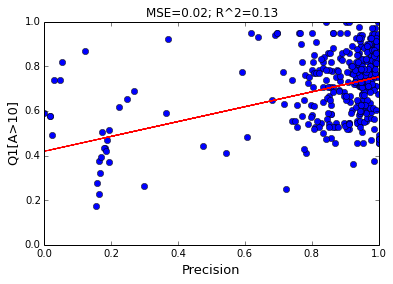

In [15]:
regression_results( ["Precision"],["Q1[A>10]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q1[A>10]']
Coefficients:  [[ 0.19638408]]
Mean squared error: 0.02
R^2: 0.04


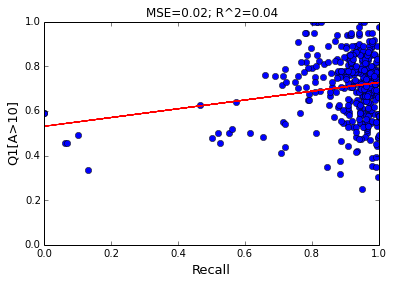

In [14]:
regression_results( ["Recall"],["Q1[A>10]"],PLOT=True)

---------------------------------------------
Regression x=['Precision'];y=['Q2[A<10]']
Coefficients:  [[ 0.14913736]]
Mean squared error: 0.01
R^2: 0.02


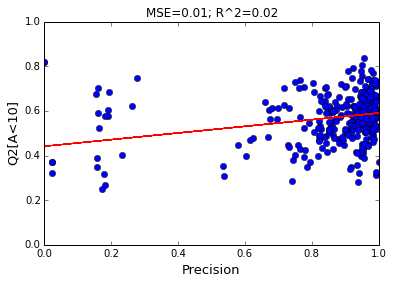

In [17]:
regression_results( ["Precision"],["Q2[A<10]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q2[A<10]']
Coefficients:  [[ 0.05287853]]
Mean squared error: 0.01
R^2: 0.01


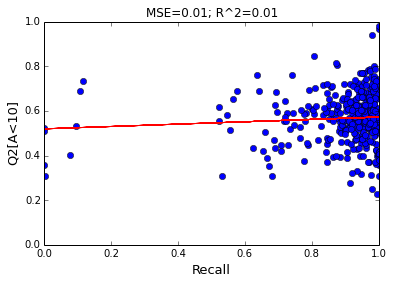

In [18]:
regression_results( ["Recall"],["Q2[A<10]"],PLOT=True)

---------------------------------------------
Regression x=['Q1[A>10]'];y=['Precision']
Coefficients:  [[ 0.58384363]]
Mean squared error: 0.03
R^2: 0.22
---------------------------------------------
Regression x=['Q1[A>10]'];y=['Recall']
Coefficients:  [[ 0.21455652]]
Mean squared error: 0.02
R^2: 0.03
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Precision']
Coefficients:  [[ 0.49238106]]
Mean squared error: 0.04
R^2: 0.05
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Recall']
Coefficients:  [[ 0.11808577]]
Mean squared error: 0.02
R^2: 0.01
---------------------------------------------
Regression x=['Qj'];y=['Precision']
Coefficients:  [[ 0.48679173]]
Mean squared error: 0.02
R^2: 0.07
---------------------------------------------
Regression x=['Qj'];y=['Recall']
Coefficients:  [[ 0.09562859]]
Mean squared error: 0.02
R^2: 0.02


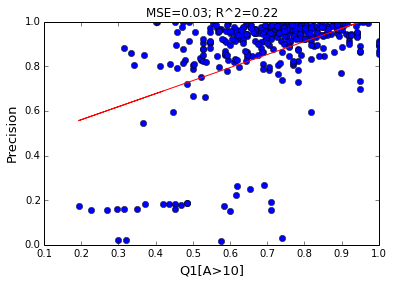

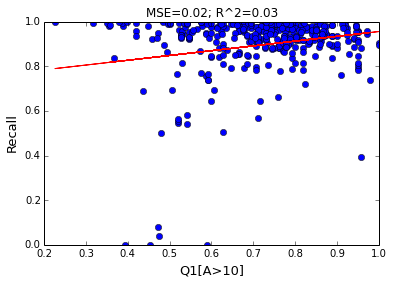

In [23]:
regression_results(["Q1[A>10]"], ["Precision"],PLOT=True)
regression_results(["Q1[A>10]"], ["Recall"],PLOT=True)
regression_results(["Q2[A<10]"], ["Precision"])
regression_results(["Q2[A<10]"], ["Recall"])
regression_results(["Qj"], ["Precision"])
regression_results(["Qj"], ["Recall"])

In [24]:
def plot_attr_histo(attr):
    data = df[attr]
    a = plt.hist(data,bins=50,normed=True)
    avg = np.mean(data)
    var = np.var(data)
    plt.title("Normalized {0} distribution [N={1}; bins=50]".format(attr,len(data)))
    plt.suptitle("mu={0:.3f};std={1:.3f}".format(avg,var))
    pdf_x = np.linspace(np.min(data),np.max(data),100)
    pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
    plt.plot(pdf_x,pdf_y,'--',color='red',linewidth=3)

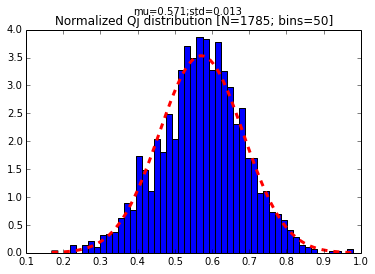

In [25]:
plot_attr_histo("Qj")

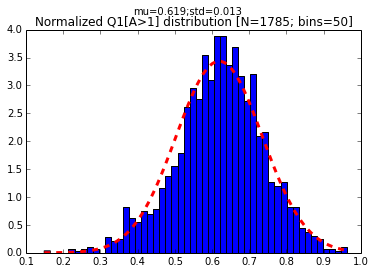

In [33]:
plot_attr_histo("Q1[A>1]")

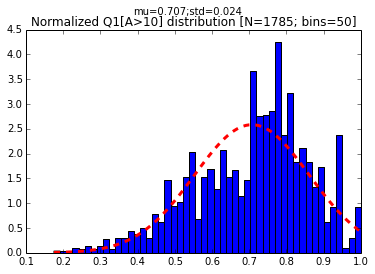

In [26]:
plot_attr_histo("Q1[A>10]")

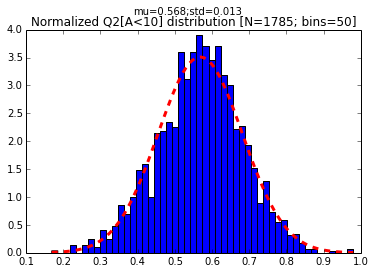

In [27]:
plot_attr_histo("Q2[A<10]")

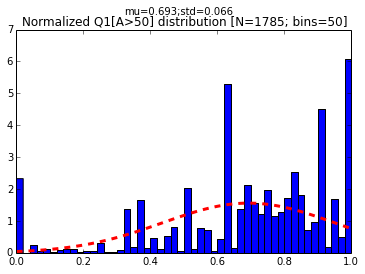

In [30]:
plot_attr_histo("Q1[A>50]")

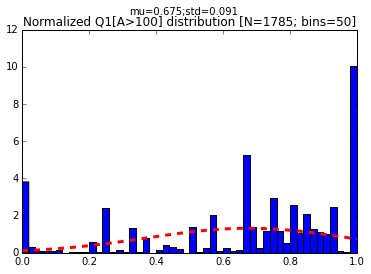

In [29]:
plot_attr_histo("Q1[A>100]")

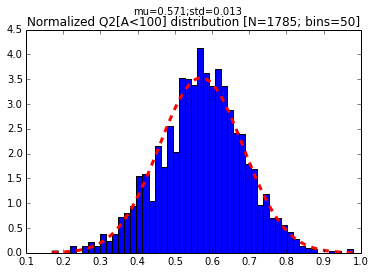

In [28]:
plot_attr_histo("Q2[A<100]")

# p(T')

In [70]:
df = pd.read_csv("../final_all_tiles/obj1to31_tile_combo_metric_area.csv",index_col=0)

In [71]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [72]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [73]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total area,Average area,pTprime,pTprime[Athres>1],pTprime[Athres>10],pTprime[Athres>50],pTprime[Athres>100],Precision,Recall
Total Votes,1.000000,0.244587,0.512015,0.003388,-0.169970,-0.169221,-0.081206,-0.119638,-0.100339,0.436324,0.537697
Average Votes,0.244587,1.000000,-0.111278,0.022598,-0.116598,-0.157698,0.071786,-0.219025,-0.173805,0.498371,0.016804
Total area,0.512015,-0.111278,1.000000,0.574823,-0.105635,-0.104679,-0.052472,-0.072428,-0.060632,0.560214,0.859186
Average area,0.003388,0.022598,0.574823,1.000000,-0.055996,-0.056368,-0.031553,-0.037294,-0.028441,0.360825,0.516359
pTprime,-0.169970,-0.116598,-0.105635,-0.055996,1.000000,0.979260,0.137990,0.859810,0.789251,-0.147545,-0.105627
pTprime[Athres>1],-0.169221,-0.157698,-0.104679,-0.056368,0.979260,1.000000,0.163127,0.871491,0.757130,-0.176839,-0.104701
pTprime[Athres>10],-0.081206,0.071786,-0.052472,-0.031553,0.137990,0.163127,1.000000,0.138147,0.115749,0.000526,-0.051811
pTprime[Athres>50],-0.119638,-0.219025,-0.072428,-0.037294,0.859810,0.871491,0.138147,1.000000,0.960122,-0.191510,-0.072647
pTprime[Athres>100],-0.100339,-0.173805,-0.060632,-0.028441,0.789251,0.757130,0.115749,0.960122,1.000000,-0.151089,-0.060847
Precision,0.436324,0.498371,0.560214,0.360825,-0.147545,-0.176839,0.000526,-0.191510,-0.151089,1.000000,0.724398


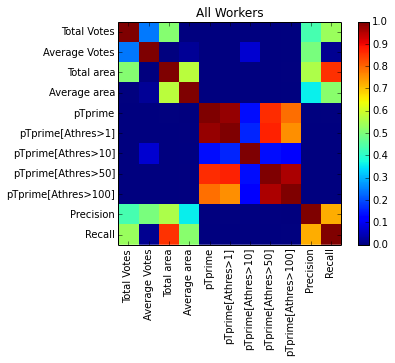

In [74]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()
plt.clim(0,1)
plt.title("All Workers")

In [164]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['pTprime'];y=['Precision']
Coefficients:  [[-3071282.49042516]]
Mean squared error: 0.06
R^2: 0.03


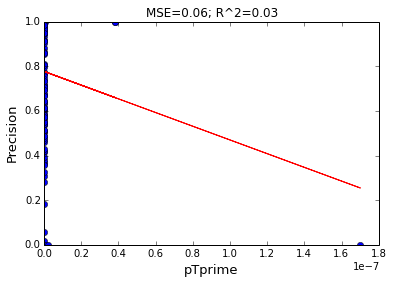

In [165]:
x_attr = ["pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['pTprime[Athres>100]'];y=['Precision']
Coefficients:  [[-32.06202935]]
Mean squared error: 0.06
R^2: -0.01


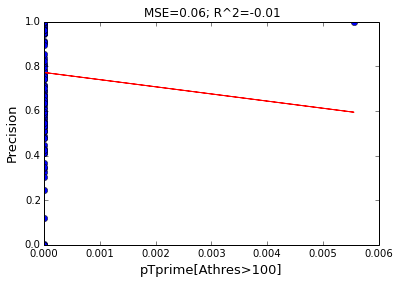

In [167]:
x_attr = ["pTprime[Athres>100]"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)